<a href="https://colab.research.google.com/github/jiw3026/analy/blob/main/%EC%B5%9C%EC%A2%85_%EC%9D%98%EC%82%AC%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC%EB%AA%A8%EB%8D%B8_%EA%B5%90%EC%B0%A8%EA%B2%80%EC%A6%9D%EC%A0%95%ED%99%95%EB%8F%84_rmse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (19.6 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/Shareddrives/신빅해-신박해커톤/preprocessing.csv')
df_축산업 = pd.read_csv('/content/drive/Shareddrives/신빅해-신박해커톤/data_045.csv', encoding='euc-kr')

In [ ]:
df.drop(columns=['Unnamed: 0'],inplace = True)

In [ ]:
df

,P1,P3,P4,P5,P6,B165,B166,C1,E1,E2,...,제조업,자동차,자동차유지비,연료/가스비,수제용품점,기타,전체금액,자전거,age,bank
0,0,1,1,0,0,0,0,210,0,0,...,0,0,70000,76000,0,0,4350000,0,20,0
1,0,1,0,0,0,0,0,40,0,0,...,0,0,0,0,0,1000,580000,0,50,0
2,0,1,1,0,0,0,0,50,0,1101101111,...,0,0,0,129000,0,0,1950000,0,40,0
3,1,1,1,0,0,0,0,50,0,0,...,0,0,0,0,0,0,43000000,0,60,0
4,0,0,1,0,0,0,0,40,0,111111111111,...,0,0,20000,0,0,0,4910000,0,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,1,0,1,0,1,0,0,30,111111111111,10001001100,...,0,0,0,0,0,0,650000,0,40,1
473225,0,1,1,0,0,0,0,50,0,110110000000,...,0,0,0,0,0,0,4790000,0,20,0
473226,1,1,1,1,0,0,0,60,0,100100011,...,0,0,95000,0,0,7000,1650000,0,40,1
473227,0,1,1,1,0,0,0,50,0,100101000,...,0,0,0,14000,0,0,1340000,0,60,0


In [ ]:
df['축산업'] = df_축산업['B25']
df.drop(columns=['P5','P6','B165','B166','E1','E2','E3','E4','E5','E6'],inplace= True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473229 entries, 0 to 473228
Data columns (total 36 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   P1        473229 non-null  int64  
 1   P3        473229 non-null  int64  
 2   P4        473229 non-null  int64  
 3   C1        473229 non-null  int64  
 4   숙박업       473229 non-null  float64
 5   여행업       473229 non-null  float64
 6   세금        473229 non-null  float64
 7   잡화및쇼핑     473229 non-null  float64
 8   농수산물      473229 non-null  float64
 9   결제대행      473229 non-null  float64
 10  요식업       473229 non-null  float64
 11  가구/전자제품   473229 non-null  float64
 12  중고품 판매점   473229 non-null  float64
 13  사무/통신기기   473229 non-null  float64
 14  통신요금      473229 non-null  float64
 15  의류        473229 non-null  float64
 16  귀금속/악세서리  473229 non-null  float64
 17  취미/문화     473229 non-null  float64
 18  학업        473229 non-null  float64
 19  보험        473229 non-null  float64
 20  예식업 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib.ticker import StrMethodFormatter,FormatStrFormatter

In [ ]:
import numpy as np
df['숙박업'] = np.log1p(df['숙박업'])
df['여행업'] = np.log1p(df['여행업'])
df['세금'] = np.log1p(df['세금'])
df['잡화및쇼핑'] = np.log1p(df['잡화및쇼핑'])
df['농수산물'] = np.log1p(df['농수산물'])
df['결제대행'] = np.log1p(df['결제대행'])
df['요식업'] = np.log1p(df['요식업'])
df['가구/전자제품'] = np.log1p(df['가구/전자제품'])
df['중고품 판매점'] = np.log1p(df['중고품 판매점'])
df['사무/통신기기'] = np.log1p(df['사무/통신기기'])
df['통신요금'] = np.log1p(df['통신요금'])
df['의류'] = np.log1p(df['의류'])
df['귀금속/악세서리'] = np.log1p(df['귀금속/악세서리'])
df['취미/문화'] = np.log1p(df['취미/문화'])
df['학업'] = np.log1p(df['학업'])
df['보험'] = np.log1p(df['보험'])
df['장례업'] = np.log1p(df['장례업'])
df['법률업'] = np.log1p(df['법률업'])
df['오락'] = np.log1p(df['오락'])
df['의료'] = np.log1p(df['의료'])
df['제조업'] = np.log1p(df['제조업'])
df['자동차'] = np.log1p(df['자동차'])
df['축산업'] = np.log1p(df['축산업'])
df['자동차유지비'] = np.log1p(df['자동차유지비'])
df['연료/가스비'] = np.log1p(df['연료/가스비'])
df['수제용품점'] = np.log1p(df['수제용품점'])
df['기타'] = np.log1p(df['기타'])
df['자전거'] = np.log1p(df['자전거'])

In [ ]:
df2 = df.drop(columns=['P5','P6','B165','B166','E1','E2','E3','E4','E5','E6'])

In [ ]:
df2.drop(columns=['오락','법률업','장례업','귀금속/악세서리','예식업', '학업' ,'세금', '숙박업', '기타', '여행업', '결제대행', '요식업', '가구/전자제품', '통신요금', '잡화및쇼핑', '사무/통신기기', '취미/문화', '의류', '보험', '의료', '제조업'], inplace=True)
df2

,P1,P3,P4,C1,농수산물,중고품 판매점,자동차,자동차유지비,연료/가스비,수제용품점,전체금액,자전거,age,bank,축산업
0,0,1,1,210,0.000000,0.0,0.0,11.156265,11.238502,0.0,4350000,0.0,20,0,0.0
1,0,1,0,40,0.000000,0.0,0.0,0.000000,0.000000,0.0,580000,0.0,50,0,0.0
2,0,1,1,50,0.000000,0.0,0.0,0.000000,11.767575,0.0,1950000,0.0,40,0,0.0
3,1,1,1,50,0.000000,0.0,0.0,0.000000,0.000000,0.0,43000000,0.0,60,0,0.0
4,0,0,1,40,0.000000,0.0,0.0,9.903538,0.000000,0.0,4910000,0.0,30,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473224,1,0,1,30,0.000000,0.0,0.0,0.000000,0.000000,0.0,650000,0.0,40,1,0.0
473225,0,1,1,50,0.000000,0.0,0.0,0.000000,0.000000,0.0,4790000,0.0,20,0,0.0
473226,1,1,1,60,0.000000,0.0,0.0,11.461643,0.000000,0.0,1650000,0.0,40,1,0.0
473227,0,1,1,50,0.000000,0.0,0.0,0.000000,9.546884,0.0,1340000,0.0,60,0,0.0


In [ ]:
df2['축산업'].describe()

count    473229.000000
mean          1.645088
std           3.849059
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          14.736590
Name: 축산업, dtype: float64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473229 entries, 0 to 473228
Data columns (total 15 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   P1       473229 non-null  int64  
 1   P3       473229 non-null  int64  
 2   P4       473229 non-null  int64  
 3   C1       473229 non-null  int64  
 4   농수산물     473229 non-null  float64
 5   중고품 판매점  473229 non-null  float64
 6   자동차      473229 non-null  float64
 7   자동차유지비   473229 non-null  float64
 8   연료/가스비   473229 non-null  float64
 9   수제용품점    473229 non-null  float64
 10  전체금액     473229 non-null  int64  
 11  자전거      473229 non-null  float64
 12  age      473229 non-null  int64  
 13  bank     473229 non-null  int64  
 14  축산업      473229 non-null  float64
dtypes: float64(8), int64(7)
memory usage: 54.2 MB


In [ ]:
df2['green_score'] = (df2['수제용품점']+df2['자전거'] +df2['중고품 판매점']) - (df2['자동차']+df2['연료/가스비']+df2['축산업'])

In [ ]:
df2['green_score'].describe()

count    473229.000000
mean         -3.056741
std           5.527056
min         -36.663481
25%          -8.987322
50%           0.000000
75%           0.000000
max          23.390522
Name: green_score, dtype: float64

In [ ]:
# 비교 양수 쪽에서 하기 위해 전체적으로 min 값 더하기
df2['green_score_cmp'] = df2['green_score']+abs(df2['green_score'].min())

In [ ]:
df2['green_score_cmp'].describe()

count    473229.000000
mean         33.606740
std           5.527056
min           0.000000
25%          27.676159
50%          36.663481
75%          36.663481
max          60.054003
Name: green_score_cmp, dtype: float64

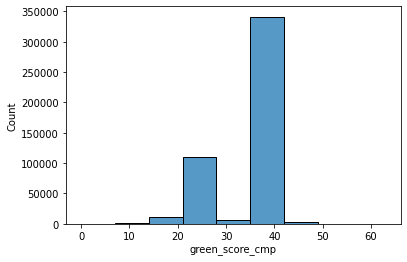

In [ ]:
sns.histplot(df2['green_score_cmp'], binwidth=7)

In [ ]:
data_train_T=df2['green_score_cmp']
target=[]
for i in range(len(data_train_T)):
    if data_train_T.iloc[i] < 20:
        target.append(1)
    elif data_train_T.iloc[i] < 30:
        target.append(2)
    elif data_train_T.iloc[i] < 45:
        target.append(3)
    else:
        target.append(4)
        
df2["Range"] = target

In [ ]:
corr_matrix = df2.corr()
corr_matrix["green_score"].sort_values(ascending=False)

green_score        1.000000
green_score_cmp    1.000000
Range              0.991839
자전거                0.116311
수제용품점              0.091399
중고품 판매점            0.087003
P3                 0.013999
P1                 0.009140
bank               0.000450
전체금액              -0.022611
자동차유지비            -0.045259
C1                -0.066903
P4                -0.067334
자동차               -0.070128
age               -0.149825
농수산물              -0.433158
연료/가스비            -0.692644
축산업               -0.716036
Name: green_score, dtype: float64

In [ ]:
df2.shape

(473229, 18)

In [ ]:
!pip install catboost
!pip install lightgbm
!pip install ngboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data_train = df2
data_train_X = data_train.drop(["green_score", "green_score_cmp"], axis = 1)
data_train_y = data_train["green_score_cmp"]
data_test = df2

In [ ]:
print(data_train_X.shape, data_train_y.shape)

(473229, 16) (473229,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing

rf_clf = DecisionTreeClassifier()
labels = preprocessing.LabelEncoder()
y_cat = labels.fit_transform(data_train_y)
X_train, X_test, y_train, y_test = train_test_split(data_train_X, y_cat, test_size = 0.3)

In [ ]:
rf_clf.fit(X_train[:300000], y_train[:300000])
pred = rf_clf.predict(X_test)
print("예측 정확도: {0:.4f}".format(accuracy_score(y_test, pred)))

예측 정확도: 0.9706


In [ ]:
fig = plt.figure(figsize=(15, 8))
_tree= tree.plot_tree(rf_clf, 
                  # feature_names=['x1', 'x2'],
                  class_names=y_cat,
                  filled=True)


NameError: ignored

<Figure size 1080x576 with 0 Axes>

In [ ]:
data_test.drop(columns=['green_score'],inplace=True)
data_test.drop(columns = ['Range', 'green_score_cmp'],inplace = True)

In [ ]:
from sklearn.metrics import mean_squared_error
def RMSE(y_pred, y):
    return mean_squared_error(y_pred, y)**0.5

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.utils import shuffle
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from ngboost import NGBRegressor
from sklearn.metrics import accuracy_score

df_target=pd.DataFrame()


skf = StratifiedKFold(n_splits = 10, random_state = 42, shuffle = True) #총 10번의 fold 진행
n = 0 #x번째 fold인지 기록

fold_target_pred = []
fold_score = []

for train_index, valid_index in skf.split(data_train_X, data_train_X['Range']): 
    n += 1
    val_pred_name = [] 
    val_pred = []      
    target_pred = []  
    rmse_arr=[]
    train_X = np.array(data_train_X.drop("Range", axis = 1)) #
    train_Y = np.array(data_train_y)
    
    X_train, X_valid = train_X[train_index], train_X[valid_index]
    y_train, y_valid = train_Y[train_index], train_Y[valid_index]
    
    X_test = np.array(data_test)

    model = LGBMRegressor(random_state = 42, verbose = 0) 
    model.fit(X_train, y_train) 
    pred = model.predict(X_valid)
    rmse = RMSE(pred,y_valid)
    
    
    rmse_arr.append(rmse)
    val_pred_name.append("LGBMRegressor")      
    val_pred.append(model.predict(X_valid))   

    target_pred.append(model.predict(data_test)) 

In [ ]:
rmse_arr

[0.10322690450515189]

In [ ]:
target_pred[0][1:10000]

array([36.66254197, 24.88866507, 36.66254197, ..., 36.66254197,
       27.09534694, 36.66254197])

In [ ]:
y_valid

array([36.66348126, 25.7854152 , 25.42497948, ..., 36.66348126,
       25.42497948, 36.66348126])

In [ ]:
df_target=pd.DataFrame()
df_target['target_pred'] = target_pred[0][1:10000]
df_target['y_valid'] = y_valid[1:10000]

df_target.to_csv('/content/drive/Shareddrives/신빅해-신박해커톤/target.csv')

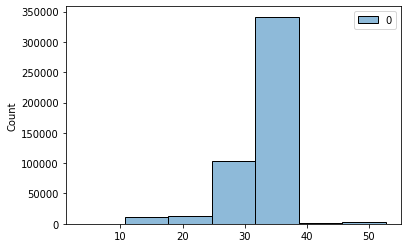

In [ ]:
sns.histplot(target_pred, binwidth=7)

In [ ]:
# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = -1 * cross_val_score(rf_clf, data_train_X[:300000], y_cat[:300000], scoring='neg_mean_absolute_error', cv=5)
print("Average MAE score (across experiments):")
print(scores.mean())

# 성능 지표는 정확도(accuracy), 교차 검증 세트는 3개
scores = cross_val_score(rf_clf, data_train_X[:300000], y_cat[:300000], scoring='accuracy', cv=10)
print('교차 검증별 정확도:', np.round(scores,4))
print('평균 검증 정확도:', np.round(np.mean(scores)))

Average MAE score (across experiments):
30.081066666666665
교차 검증별 정확도: [0.9712 0.9709 0.9702 0.9696 0.9709 0.9707 0.9711 0.971  0.9701 0.9709]
평균 검증 정확도: 1.0
